
<center><h1>Wang_Xinwei_DSCI-510_Final_Project_Visuals</h1></center>
<br>
Name: Xinwei Wang
<br>
USC Email: xwang663@usc.edu
<br>
USC ID: 3031617891
<br>
Github Username: xwang-Vanessa
<br>

This notebook presents the visual results of the DSCI 510 final project.  
All data collection and processing scripts are in in the `src/` folder.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/la_daily_cdo.csv")

df["date"] = pd.to_datetime(df["date"])
df.head()

,date,AWND,PRCP,TMAX,TMIN,tmax_c,tmin_c,temp_range_c,temp_avg_c,prcp_mm,awnd_ms,year,month,temp_avg_c_roll7,prcp_mm_roll7,temp_avg_c_roll14,prcp_mm_roll14,prcp_z_nov
0,2015-11-01,1.8,0.0,26.7,15.6,2.67,1.56,1.11,2.115,0.00,0.18,2015,11,2.115000,0.000000,2.115000,0.000000,-0.164959
1,2015-11-02,5.1,0.8,21.7,14.4,2.17,1.44,0.73,1.805,0.08,0.51,2015,11,1.960000,0.040000,1.960000,0.040000,0.063227
2,2015-11-03,3.4,0.0,20.0,12.2,2.00,1.22,0.78,1.610,0.00,0.34,2015,11,1.843333,0.026667,1.843333,0.026667,-0.164959
3,2015-11-04,3.7,0.0,19.4,10.0,1.94,1.00,0.94,1.470,0.00,0.37,2015,11,1.750000,0.020000,1.750000,0.020000,-0.164959
4,2015-11-05,3.2,0.0,22.2,10.6,2.22,1.06,1.16,1.640,0.00,0.32,2015,11,1.728000,0.016000,1.728000,0.016000,-0.164959


In [4]:
baseline = df[(df["month"] == 11) & (df["year"] >= 2015) & (df["year"] <= 2024)]

days_used = len(baseline)
mean_mm = baseline["prcp_mm"].mean()
std_mm = baseline["prcp_mm"].std()
p50_mm = baseline["prcp_mm"].quantile(0.50)
p75_mm = baseline["prcp_mm"].quantile(0.75)
p90_mm = baseline["prcp_mm"].quantile(0.90)
p95_mm = baseline["prcp_mm"].quantile(0.95)

print("Baseline from November 2015 to 2024 for LA daily precipitation in mm")
print("Number of days:", days_used)
print("Mean daily precipitation:", mean_mm)
print("Standard deviation:", std_mm)
print("Median (50th percentile):", p50_mm)
print("75th percentile:", p75_mm)
print("90th percentile:", p90_mm)
print("95th percentile:", p95_mm)

Baseline from November 2015 to 2024 for LA daily precipitation in mm
Number of days: 300
Mean daily precipitation: 0.05783333333333334
Standard deviation: 0.35117714929864113
Median (50th percentile): 0.0
75th percentile: 0.0
90th percentile: 0.0
95th percentile: 0.18


Daily TMAX / TMIN

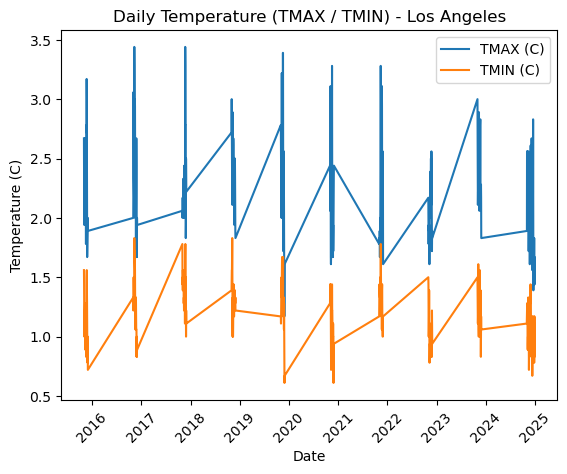

In [6]:
plt.figure()
plt.plot(df["date"], df["tmax_c"], label="TMAX (C)")
plt.plot(df["date"], df["tmin_c"], label="TMIN (C)")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("Daily Temperature (TMAX / TMIN) - Los Angeles")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Daily Precipitation

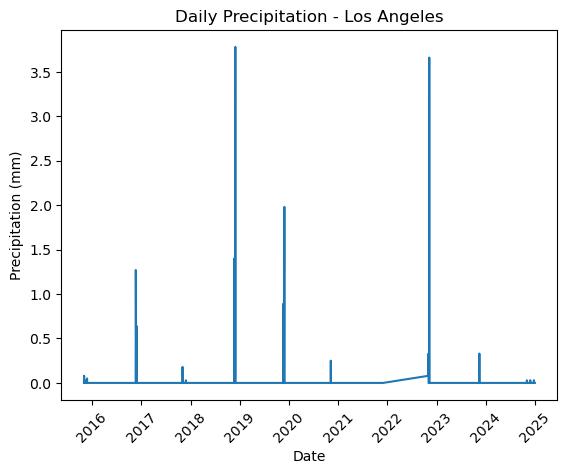

In [7]:
plt.figure()
plt.plot(df["date"], df["prcp_mm"])
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.title("Daily Precipitation - Los Angeles")
plt.xticks(rotation=45)
plt.show()

7-day Rolling Avg Precipitation

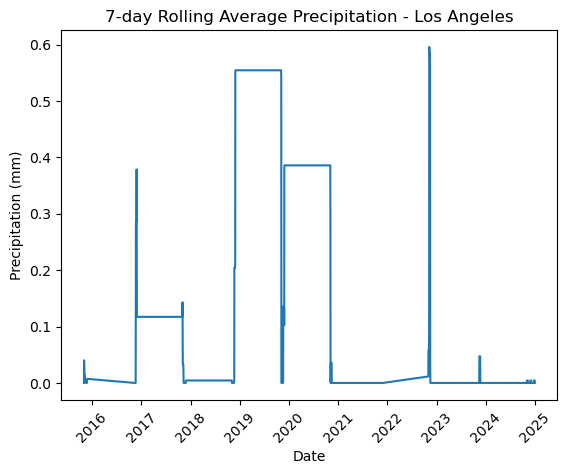

In [8]:
plt.figure()
plt.plot(df["date"], df["prcp_mm_roll7"])
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.title("7-day Rolling Average Precipitation - Los Angeles")
plt.xticks(rotation=45)
plt.show()

November Temperature Distribution by Year

/var/folders/hk/l7c80d_x3hs58d8bwh11t0l40000gn/T/ipykernel_8360/3304261528.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=years, showfliers=False)


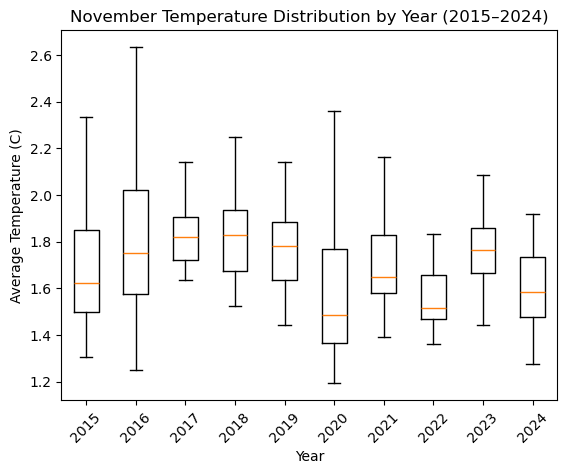

In [9]:
nov = df[df["month"] == 11]
years = sorted(nov["year"].unique())
data = []

for y in years:
    data.append(nov[nov["year"] == y]["temp_avg_c"].dropna())

plt.figure()
plt.boxplot(data, labels=years, showfliers=False)
plt.xlabel("Year")
plt.ylabel("Average Temperature (C)")
plt.title("November Temperature Distribution by Year (2015–2024)")
plt.xticks(rotation=45)
plt.show()

Nov 2024 Precipitation Z-score

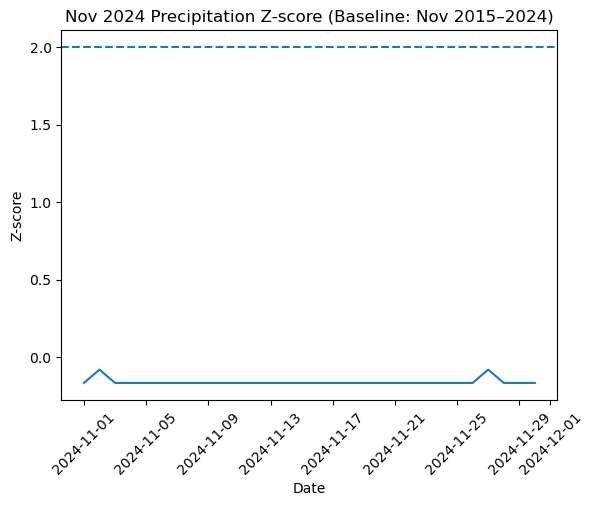

In [10]:
nov_2024 = df[(df["year"] == 2024) & (df["month"] == 11)]

plt.figure()
plt.plot(nov_2024["date"], nov_2024["prcp_z_nov"])
plt.axhline(2.0, linestyle="--")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.title("Nov 2024 Precipitation Z-score (Baseline: Nov 2015–2024)")
plt.xticks(rotation=45)
plt.show()

Temperature vs Wind Speed

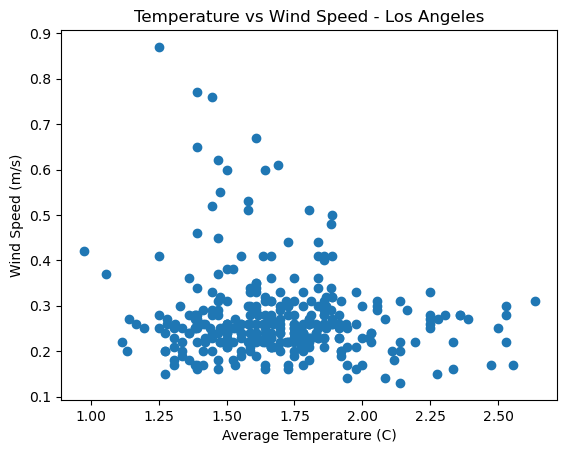

In [11]:
plt.figure()
plt.scatter(df["temp_avg_c"], df["awnd_ms"])
plt.xlabel("Average Temperature (C)")
plt.ylabel("Wind Speed (m/s)")
plt.title("Temperature vs Wind Speed - Los Angeles")
plt.show()